# 1. Veri Toplama ve Ön İşleme

Başlagıçta gerekli olan kütüphaneleri ekliyoruz.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mt

## 1.1 Veri Setinin İçe Aktarılması ve Ön İşleme Tabi Tutulması

sahibinden.com' dan çekilmiş verilerden oluşan cvs dosyamızı df adlı datafareme aktarıyoruz ve ilk 5 satırını gözlemliyoruz.

In [2]:
df = pd.read_csv('arac_ilanlari.csv')
df.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'..."
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',..."
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '..."
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sedan 35 TFSI', 'Marka': 'Audi',...","İstanbul, Sarıyer","['33.000 km', '2020 model', 'Benzin', '150 hp'..."
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.4 TDI Trendline', 'Marka': 'Volks...","Kırklareli, Lüleburgaz","['125.000 km', '2015 model', 'Dizel', '75 hp',..."


Görüldüğü gibi dataframeimizde veriler çok dağınık bir şekilde bulunuyor. 

İlan kategorisinden yer alan bilgileri sütunlara ayırma işlemlerini gerçekleştirelim.

## 1.2 Verilerin Ön İşleme Tabi Tutulması

In [3]:
df['ilan_kategorisi'] = df['ilan_kategorisi'].apply(eval)
df['vasıta_id'] = df['ilan_kategorisi'].apply(lambda x: x[0]['id'])
df['vasıta_label'] = df['ilan_kategorisi'].apply(lambda x: x[0]['label'])
df['otomobil_id'] = df['ilan_kategorisi'].apply(lambda x: x[1]['id'])
df['otomobil_label'] = df['ilan_kategorisi'].apply(lambda x: x[1]['label'])
df['marka_id'] = df['ilan_kategorisi'].apply(lambda x: x[2]['id'])
df['marka_label'] = df['ilan_kategorisi'].apply(lambda x: x[2]['label'])
df['model_id'] = df['ilan_kategorisi'].apply(lambda x: x[3]['id'])
df['model_label'] = df['ilan_kategorisi'].apply(lambda x: x[3]['label'])
df['ek_model_id'] = df['ilan_kategorisi'].apply(lambda x: x[4]['id']
                                                if len(x) > 6 else None)
df['ek_model_label'] = df['ilan_kategorisi'].apply(lambda x: x[4]['label']
                                                   if len(x) > 6 else None)
df['motor_id'] = df['ilan_kategorisi'].apply(lambda x: x[5]['id']
                                             if len(x) > 6 else x[4]['id'])
df['motor_label'] = df['ilan_kategorisi'].apply(
    lambda x: x[5]['label'] if len(x) > 6 else x[4]['label'])
df['paket_id'] = df['ilan_kategorisi'].apply(lambda x: x[6]['id']
                                             if len(x) > 6 else x[5]['id'])
df['paket_label'] = df['ilan_kategorisi'].apply(
    lambda x: x[6]['label'] if len(x) > 6 else x[5]['label'])
df['ek_model_label'] = df['ek_model_label'].replace({None: np.nan})

Dataframeimizin ilk 3 satırını ekrana yazdıralım.

In [4]:
df.head(3)

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri,vasıta_id,...,marka_id,marka_label,model_id,model_label,ek_model_id,ek_model_label,motor_id,motor_label,paket_id,paket_label
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'...",3517,...,3597,Renault,23615,Megane,NaN,NaN,197932,1.5 dCi,191830,Icon
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',...",3517,...,3597,Renault,23615,Megane,NaN,NaN,197932,1.5 dCi,191830,Icon
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '...",3517,...,3549,Audi,23422,A3,231816.0,A3 Sportback,199112,1.6,3774,Attraction


arac_tagleri sütununda yer alan araç ile ilgili model, marka, seri gibi değişkenlerini alıp model, marka, seri sutünlarına yerleştirelim.

In [5]:
df[['model', 'marka', 'seri']] = df['arac_tagleri'].str.extract(
    r"{'Model': '(.*?)', 'Marka': '(.*?)', 'Seri': '(.*?)'}")
df.head(3)

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri,vasıta_id,...,model_label,ek_model_id,ek_model_label,motor_id,motor_label,paket_id,paket_label,model,marka,seri
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'...",3517,...,Megane,NaN,NaN,197932,1.5 dCi,191830,Icon,1.5 dCi Icon,Renault,Megane
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',...",3517,...,Megane,NaN,NaN,197932,1.5 dCi,191830,Icon,1.5 dCi Icon,Renault,Megane
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '...",3517,...,A3,231816.0,A3 Sportback,199112,1.6,3774,Attraction,A3 Sportback 1.6,Audi,A3


ilan_konumu sütununda yer alan il,ilçe,mahalle gibi verileri alıp il, ilçe, mahalle sütunlarına yerleştirelim

In [6]:
df['il'] = ''
df['ilce'] = ''
df['mahalle'] = ''
for index, row in df.iterrows():
    konum = row['ilan_konumu'].split(', ')
    if konum[0] in [
            "Adana", "Adıyaman", "Afyonkarahisar", "Ağrı", "Aksaray", "Amasya",
            "Ankara", "Antalya", "Ardahan", "Artvin", "Aydın", "Balıkesir",
            "Bartın", "Batman", "Bayburt", "Bilecik", "Bingöl", "Bitlis",
            "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum",
            "Denizli", "Diyarbakır", "Düzce", "Edirne", "Elazığ", "Erzincan",
            "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane",
            "Hakkari", "Hatay", "Iğdır", "Isparta", "Mersin", "İstanbul",
            "İzmir", "Kahramanmaraş", "Karabük", "Karaman", "Kars",
            "Kastamonu", "Kayseri", "Kırıkkale", "Kırklareli", "Kırşehir",
            "Kilis", "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa",
            "Mardin", "Muğla", "Muş", "Nevşehir", "Niğde", "Ordu", "Osmaniye",
            "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas",
            "Şanlıurfa", "Şırnak", "Tekirdağ", "Tokat", "Trabzon", "Tunceli",
            "Uşak", "Van", "Yalova", "Yozgat", "Zonguldak"
    ]:
        df.at[index, 'il'] = konum[0]
        if len(konum) > 1:
            df.at[index, 'ilce'] = konum[1]
    else:
        df.at[index, 'ilce'] = konum[0]
        if len(konum) > 1:
            df.at[index, 'mahalle'] = konum[1]

il, ilçe, mahalle sütunlarındaki değerleri NaN değişken olarak değiştirelim. 

In [7]:
df["il"].replace(to_replace="", value=np.NAN, inplace=True)
df["ilce"].replace(to_replace="", value=np.NAN, inplace=True)
df["mahalle"].replace(to_replace="", value=np.NAN, inplace=True)
df.head(3)

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri,vasıta_id,...,motor_id,motor_label,paket_id,paket_label,model,marka,seri,il,ilce,mahalle
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'...",3517,...,197932,1.5 dCi,191830,Icon,1.5 dCi Icon,Renault,Megane,İstanbul,Ümraniye,NaN
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',...",3517,...,197932,1.5 dCi,191830,Icon,1.5 dCi Icon,Renault,Megane,İzmir,Konak,NaN
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '...",3517,...,199112,1.6,3774,Attraction,A3 Sportback 1.6,Audi,A3,Adana,Seyhan,NaN


arac_ozellikleri sütunundaki karmaşık verileri ayrı ayrı sütunlara çekelim ve df'e koyalım.

In [8]:
df['km_bilgisi'] = df['arac_ozellikleri'].str.extract('(\d+\.\d+|\d+) km',
                                                      expand=False)
df['model_yili'] = df['arac_ozellikleri'].str.extract('(\d{4}) model',
                                                      expand=False)
df['yakit_turu'] = df['arac_ozellikleri'].str.extract(
    '(Elektrik|Hybrid|Dizel|Benzin & LPG|Benzin)', expand=False)
df['beygir_gucu'] = df['arac_ozellikleri'].str.extract(
    r'(\d+ hp|\d+ - \d+ HP)')
df['vites_turu'] = df['arac_ozellikleri'].str.extract(
    '(Manuel|Otomatik|Yarı Otomatik)', expand=False)
df['beygir_gucu'] = df['beygir_gucu'].str.replace(' hp',
                                                  '').str.replace(' HP', '')
df['beygir_gucu'] = df['beygir_gucu'].str.split(' - ').str[-1]
df['km_bilgisi'] = df['km_bilgisi'].str.replace('.', '')
df.head(3)

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri,vasıta_id,...,marka,seri,il,ilce,mahalle,km_bilgisi,model_yili,yakit_turu,beygir_gucu,vites_turu
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'...",3517,...,Renault,Megane,İstanbul,Ümraniye,NaN,143000,2016,Dizel,110,Otomatik
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',...",3517,...,Renault,Megane,İzmir,Konak,NaN,80000,2017,Dizel,110,Otomatik
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '...",3517,...,Audi,A3,Adana,Seyhan,NaN,177000,2011,Benzin & LPG,102,Manuel


Fiyat Tahmini İçin gerekli sutunlar hariç diğer sutunları silelim.

In [9]:
silinecek_sutunlar = [
    'ilan_id', 'ilan_basligi', 'fiyat_kuru', 'ilan_tarihi', 'ilan_kategorisi',
    'arac_tagleri', 'ilan_konumu', 'arac_ozellikleri'
]
df = df.drop(silinecek_sutunlar, axis=1)

silinecek_sutunlar1 = [
    'vasıta_id', 'vasıta_label', 'otomobil_id', 'marka_id', 'model_id',
    'ek_model_id', 'ek_model_label', 'motor_id'
]
df = df.drop(silinecek_sutunlar1, axis=1)

silinecek_sutunlar2 = ['paket_id', 'model', 'marka', 'seri']
df = df.drop(silinecek_sutunlar2, axis=1)
df.head(3)

,fiyat,otomobil_label,marka_label,model_label,motor_label,paket_label,il,ilce,mahalle,km_bilgisi,model_yili,yakit_turu,beygir_gucu,vites_turu
0,830000.0,Otomobil,Renault,Megane,1.5 dCi,Icon,İstanbul,Ümraniye,NaN,143000,2016,Dizel,110,Otomatik
1,905000.0,Otomobil,Renault,Megane,1.5 dCi,Icon,İzmir,Konak,NaN,80000,2017,Dizel,110,Otomatik
2,695000.0,Otomobil,Audi,A3,1.6,Attraction,Adana,Seyhan,NaN,177000,2011,Benzin & LPG,102,Manuel


## 1.3 Eksik Değerleri Ele Alınması

Hangi sütunlarımızda kaçar tane eksik değer var görüntüleyelim.

In [10]:
df.isnull().sum()

fiyat                  0
otomobil_label         0
marka_label            0
model_label            0
motor_label            0
paket_label            0
il                 53251
ilce                 295
mahalle           505770
km_bilgisi             1
model_yili             1
yakit_turu             1
beygir_gucu          128
vites_turu            54
dtype: int64

beygir_gucu ve vites_turu sütunlarındaki NaN değer bulunan satırları kaldıralım. İl, İlçe, mahalle sütunlarının NaN değerleri ilerleyen kodlarda düzenlenecektir. 

In [11]:
df = df.dropna(subset=['beygir_gucu'])
df = df.dropna(subset=['vites_turu'])
df.isnull().sum()

fiyat                  0
otomobil_label         0
marka_label            0
model_label            0
motor_label            0
paket_label            0
il                 53240
ilce                 295
mahalle           505599
km_bilgisi             0
model_yili             0
yakit_turu             0
beygir_gucu            0
vites_turu             0
dtype: int64

Oluşturduğumuz dataframein veri tiplerini inceleyelim. 

In [12]:
df.dtypes

fiyat             float64
otomobil_label     object
marka_label        object
model_label        object
motor_label        object
paket_label        object
il                 object
ilce               object
mahalle            object
km_bilgisi         object
model_yili         object
yakit_turu         object
beygir_gucu        object
vites_turu         object
dtype: object

Object veri tipinde olan km_bilgisi, model_yili, beygir_gücü sütunlarını numeric değerlere dönüştürelim ve veri tiplerinin en son halini ekrana bastıralım.

In [13]:
df['km_bilgisi'] = pd.to_numeric(df['km_bilgisi'], errors='raise')
df['model_yili'] = pd.to_numeric(df['model_yili'], errors='raise')
df['beygir_gucu'] = pd.to_numeric(df['beygir_gucu'], errors='raise')
df.dtypes

fiyat             float64
otomobil_label     object
marka_label        object
model_label        object
motor_label        object
paket_label        object
il                 object
ilce               object
mahalle            object
km_bilgisi          int64
model_yili          int64
yakit_turu         object
beygir_gucu         int64
vites_turu         object
dtype: object

Dataframeimizin il,ilçe,mahalle içeren en son halininin yedeğini alalım. Bu csv dosyasını ilerde fiyat tahminin dışında verilerden elde edilebilecek bilgiler için kullanıcaz.

In [14]:
df.to_csv('dahil_ilicemahalle.csv', index=False)

Dataframeimizden il,ilçe,mahalle sütunlarını kaldıralım çünkü fiyat tahmini yaparken ihtiyacımız olmayacak.

Ardından kalan diğer NaN değerlerinin olduğu sütunları da silelim.

In [15]:
silinecek_sutunlar3 = ['il', 'ilce', 'mahalle']
df = df.drop(silinecek_sutunlar3, axis=1)
df.isnull().sum()

fiyat             0
otomobil_label    0
marka_label       0
model_label       0
motor_label       0
paket_label       0
km_bilgisi        0
model_yili        0
yakit_turu        0
beygir_gucu       0
vites_turu        0
dtype: int64

## 1.4 Verilerdeki Yanlış Bilgilerin Düzeltilmesi

#### Fiyatta 0 atanların tespit edilmesi.
Burada aracın fiyatı 200.000 den az ve model yılı 2010 dan fazla olan araçları tespit edip çıkarıyoruz.

In [16]:
df = df.drop(df[(df['fiyat'] <= 200000) & (df['model_yili'] >= 2010)].index)

#### Kilometre bilgisini sahte 0 yazanları tespit edilmesi
model yılı 2010 den küçük olan arabanın km'si 10.000km den az olaması çok nadiren gerçekleşir.

In [17]:
df = df.drop(df[(df['model_yili'] >= 2010)
                & (df['km_bilgisi'] <= 10000)].index)

#### Kafasına göre fiyat yazanların tespit edilmesi
fiyat 50.000 tl den az olamaz

In [18]:
df = df.drop(df[(df['fiyat'] <= 50000)].index)

dataframeimizin en son hali hakkında ekrana çıktı verelim.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535787 entries, 0 to 556755
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fiyat           535787 non-null  float64
 1   otomobil_label  535787 non-null  object 
 2   marka_label     535787 non-null  object 
 3   model_label     535787 non-null  object 
 4   motor_label     535787 non-null  object 
 5   paket_label     535787 non-null  object 
 6   km_bilgisi      535787 non-null  int64  
 7   model_yili      535787 non-null  int64  
 8   yakit_turu      535787 non-null  object 
 9   beygir_gucu     535787 non-null  int64  
 10  vites_turu      535787 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 49.1+ MB


Dataframeimizin yedeğini alalım.

In [20]:
df.to_csv('fiyattahminiicin.csv', index=False)

## 1.5 Verilerin Temizlenmesi ve Biçimlendirilmesi

Yedeğini aldığımız dataframeimizi df değişkenine kopyalayalıyoruz.

In [21]:
data = pd.read_csv('fiyattahminiicin.csv')
df = data.copy()

motor_label sütununda olmaması gereken verilerin bulunduğu sütunları siliyoruz. 

In [22]:
# Eğer 'motor_label' sütununda 'A3 Cabrio' varsa o satırları sil
df = df[df['motor_label'] != 'A3 Cabrio']

# Eğer 'motor_label' sütununda 'A3 Sportback' varsa o satırları sil
df = df[df['motor_label'] != 'A3 Sportback']

# Eğer 'motor_label' sütununda 'A5 Sportback' varsa o satırları sil
df = df[df['motor_label'] != 'A5 Sportback']

motor_label sütutunda bulunan değerleri bastırıyoruz.

In [23]:
df.motor_label.value_counts()

motor_label
1.5 dCi                 136599
1.6                      96335
1.6 TDI                  68657
1.4                      49784
1.4 TDI                  32729
1.3 TCe                  22308
1.5 Blue DCI             18459
1.2 TSI                  18174
1.0 TSI                  16447
1.2 TDI                  13989
35 TFSI                   9640
1.4 T                     7854
1.4 TFSI                  6701
1.0                       4086
1.2                       3906
1.5 dCi Sport Tourer      3481
2.0                       3323
1.0 TFSI                  2902
1.2 PureTech              2320
30 TDI                    2169
1.2 TCe                   1719
1.6 Coupe                 1681
30 TFSI                   1529
1.4 TSI                   1425
1.5 BlueHDi               1381
1.9 DTi                   1294
1.9 D                      961
1.2 TFSI                   881
1.6 dCi                    597
1.6 FSI                    544
1.9 TDI                    419
1.5 TFSI                   

1.0 motor uzantılarını dikkate almayarak 1.0 yapıyoruz.

In [24]:
df.loc[df.motor_label == "1.0", "motor"] = "1.0"
df.loc[df.motor_label == "1.0 TCe", "motor"] = "1.0"
df.loc[df.motor_label == "1.0 TFSI", "motor"] = "1.0"
df.loc[df.motor_label == "1.0 TSI", "motor"] = "1.0"

1.2 motor uzantılarını dikkate almayarak 1.2 yapıyoruz.

In [25]:
df.loc[df.motor_label == "1.2", "motor"] = "1.2"
df.loc[df.motor_label == "1.2 PureTech", "motor"] = "1.2"
df.loc[df.motor_label == "1.2 TCe", "motor"] = "1.2"
df.loc[df.motor_label == "1.2 TDI", "motor"] = "1.2"
df.loc[df.motor_label == "1.2 TFSI", "motor"] = "1.2"
df.loc[df.motor_label == "1.2 TSI", "motor"] = "1.2"

1.3 motor uzantılarını dikkate almayarak 1.3 yapıyoruz.

In [26]:
df.loc[df.motor_label == "1.3", "motor"] = "1.3"
df.loc[df.motor_label == "1.3 TCe", "motor"] = "1.3"

1.4 motor uzantılarını dikkate almayarak 1.4 yapıyoruz.

In [27]:
df.loc[df.motor_label == "1.4", "motor"] = "1.4"
df.loc[df.motor_label == "1.4 T", "motor"] = "1.4"
df.loc[df.motor_label == "1.4 T Sport Tourer", "motor"] = "1.4"
df.loc[df.motor_label == "1.4 TDI", "motor"] = "1.4"
df.loc[df.motor_label == "1.4 TFSI", "motor"] = "1.4"
df.loc[df.motor_label == "1.4 TSI", "motor"] = "1.4"

1.5 motor uzantılarını dikkate almayarak 1.5 yapıyoruz.

In [28]:
df.loc[df.motor_label == "1.5 Blue DCI", "motor"] = "1.5"
df.loc[df.motor_label == "1.5 BlueHDi", "motor"] = "1.5"
df.loc[df.motor_label == "1.5 TFSI", "motor"] = "1.5"
df.loc[df.motor_label == "1.5 dCi", "motor"] = "1.5"
df.loc[df.motor_label == "1.5 dCi Grandtour", "motor"] = "1.5"
df.loc[df.motor_label == "1.5 dCi Sport Tourer", "motor"] = "1.5"

1.6 motor uzantılarını dikkate almayarak 1.6 yapıyoruz.

In [29]:
df.loc[df.motor_label == "1.6", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 BlueHDi", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 CC", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 Cabrio", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 Coupe", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 FSI", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 Grandtour", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 Sport Tourer", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 TDI", "motor"] = "1.6"
df.loc[df.motor_label == "1.6 dCi", "motor"] = "1.6"

1.8 motor uzantılarını dikkate almayarak 1.8 yapıyoruz.

In [30]:
df.loc[df.motor_label == "1.8", "motor"] = "1.8"
df.loc[df.motor_label == "1.8 T", "motor"] = "1.8"
df.loc[df.motor_label == "1.8 TFSI", "motor"] = "1.8"

1.9 motor uzantılarını dikkate almayarak 1.9 yapıyoruz.

In [31]:
df.loc[df.motor_label == "1.9 CC", "motor"] = "1.9"
df.loc[df.motor_label == "1.9 D", "motor"] = "1.9"
df.loc[df.motor_label == "1.9 DTi", "motor"] = "1.9"
df.loc[df.motor_label == "1.9 SDI", "motor"] = "1.9"
df.loc[df.motor_label == "1.9 TDI", "motor"] = "1.9"
df.loc[df.motor_label == "1.9 dCi", "motor"] = "1.9"
df.loc[df.motor_label == "1.9 dCi Grandtour", "motor"] = "1.9"

2.0 motor uzantılarını dikkate almayarak 2.0 yapıyoruz.

In [32]:
df.loc[df.motor_label == "2.0", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 CC", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 Cabrio", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 Coupe", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 FSI", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 Grandtour", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 T", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 TDI", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 TFSI", "motor"] = "2.0"
df.loc[df.motor_label == "2.0 dCi", "motor"] = "2.0"

3.0 motor uzantılarını dikkate almayarak 3.0 yapıyoruz.

In [33]:
df.loc[df.motor_label == "30 TDI", "motor"] = "3.0"
df.loc[df.motor_label == "30 TFSI", "motor"] = "3.0"

Son olarak 3.2 ve 3.5 motor atıyoruz.

In [34]:
df.loc[df.motor_label == "3.2", "motor"] = "3.2"
df.loc[df.motor_label == "35 TFSI", "motor"] = "3.5"

motor sütununda yer alan değişken sayılarını bastırıyoruz.

In [35]:
df.motor.value_counts()

motor
1.6    168457
1.5    160329
1.4     98519
1.2     40989
1.0     23506
1.3     22360
3.5      9640
2.0      3935
3.0      3698
1.9      3029
1.8       568
3.2        18
Name: count, dtype: int64

motor sütununun veri tipini numerik yapıyoruz. Ardından motor_label sütunu ile işimiz kalmadığı için df'den kaldırıyoruz.

In [36]:
df['motor'] = pd.to_numeric(df['motor'], errors='raise')
df.drop(columns='motor_label', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535048 entries, 0 to 535786
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fiyat           535048 non-null  float64
 1   otomobil_label  535048 non-null  object 
 2   marka_label     535048 non-null  object 
 3   model_label     535048 non-null  object 
 4   paket_label     535048 non-null  object 
 5   km_bilgisi      535048 non-null  int64  
 6   model_yili      535048 non-null  int64  
 7   yakit_turu      535048 non-null  object 
 8   beygir_gucu     535048 non-null  int64  
 9   vites_turu      535048 non-null  object 
 10  motor           535048 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 49.0+ MB


Araç fiyat tahmini için kullanacağımız verisetinin yedeğini csv dosyası olarak alıyoruz.

In [37]:
df.to_csv('fiyattahmin.csv', index=False)

## 1.6 Verilerdeki Aykırı Değerlerin Ele Alınması

Yedeğini aldığımız fiyattahmin.csv dosyanını df değişkenine aktarıyoruz. 

In [38]:
data = pd.read_csv('fiyattahmin.csv')
df = data.copy()

Veri setimizdeki km_bilgisi sütunundaki aykırı değerleri tespit etmek için grafiğini çizdiriyoruz.

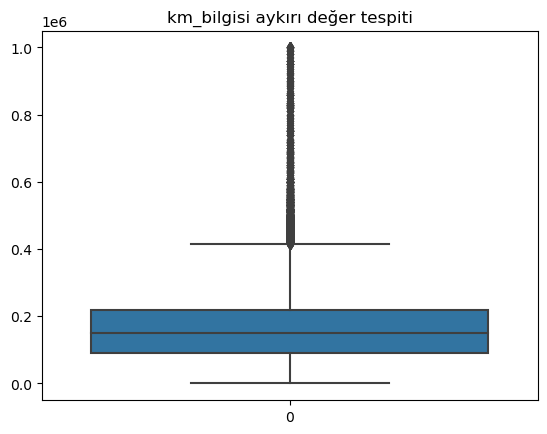

In [39]:
sns.boxplot(data=df["km_bilgisi"])
plt.title("km_bilgisi aykırı değer tespiti")
plt.show()

km_bilgisi sütunundaki aykırı değerleri kaldırıyoruz.

In [40]:
Q1 = df["km_bilgisi"].quantile(0.25)
Q3 = df["km_bilgisi"].quantile(0.75)
IQR = Q3 - Q1

altsınır = Q1 - 1.5 * IQR
ustsınır = Q3 + 1.5 * IQR

aykırımin = df[df["km_bilgisi"] < altsınır]["km_bilgisi"]
aykırımax = df[df["km_bilgisi"] > ustsınır]["km_bilgisi"]

aykırı = pd.concat([aykırımin, aykırımax], axis=0).index
indeksler = []
for i in aykırı:
    indeksler.append(i)

veri2 = df.drop(df.index[indeksler])

km_bilgisi sütunundan aykırı değerleri kaldırdıktan sonraki grafiğini çizdiriyoruz.

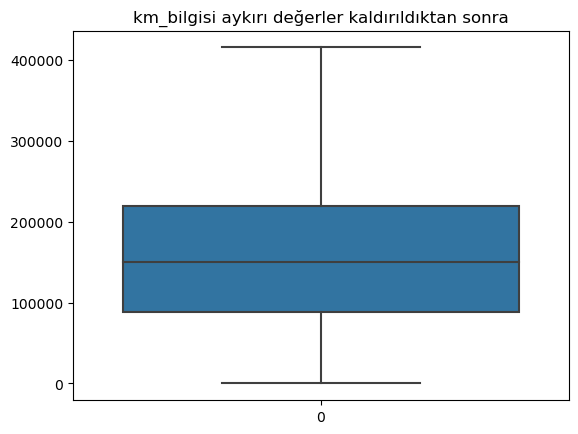

In [41]:
sns.boxplot(data=veri2["km_bilgisi"])
plt.title("km_bilgisi aykırı değerler kaldırıldıktan sonra")
plt.show()

Veri setimizdeki model_yili sütunundaki aykırı değerleri tespit etmek için grafiğini çizdiriyoruz.

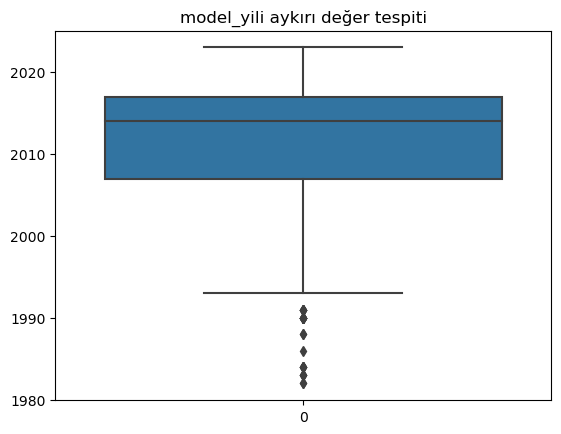

In [42]:
sns.boxplot(data=df["model_yili"])
plt.title("model_yili aykırı değer tespiti")
plt.show()

model_yili sütunundaki aykırı değerleri kaldırıyoruz.

In [43]:
Q1 = df["model_yili"].quantile(0.25)
Q3 = df["model_yili"].quantile(0.75)
IQR = Q3 - Q1

altsınır = Q1 - 1.5 * IQR
ustsınır = Q3 + 1.5 * IQR

aykırımin = df[df["model_yili"] < altsınır]["model_yili"]
aykırımax = df[df["model_yili"] > ustsınır]["model_yili"]

aykırı = pd.concat([aykırımin, aykırımax], axis=0).index
indeksler = []
for i in aykırı:
    indeksler.append(i)

veri2 = df.drop(df.index[indeksler])

model_yili sütunundan aykırı değerleri kaldırdıktan sonraki grafiğini çizdiriyoruz.

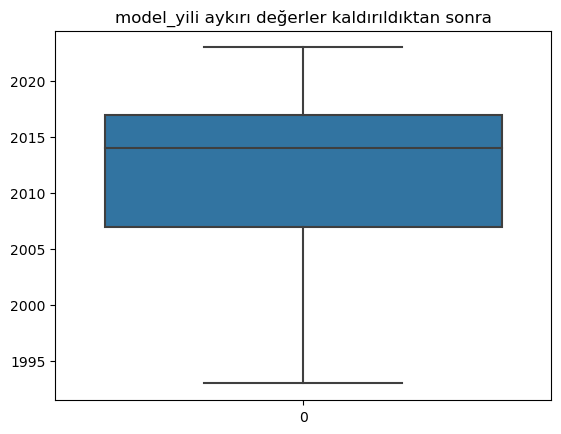

In [44]:
sns.boxplot(data=veri2["model_yili"])
plt.title("model_yili aykırı değerler kaldırıldıktan sonra")
plt.show()

Veri setimizdeki beygir_gücü sütunundaki aykırı değerleri tespit etmek için grafiğini çizdiriyoruz.

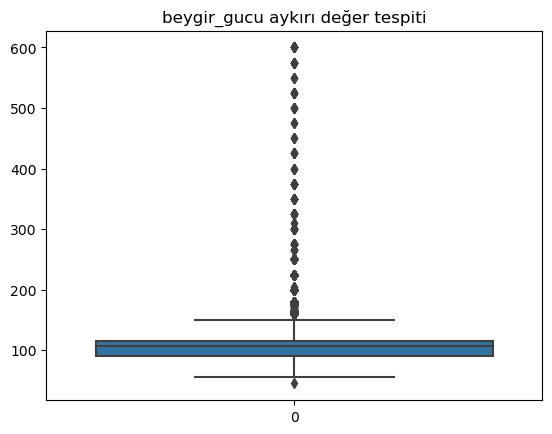

In [45]:
sns.boxplot(data=df["beygir_gucu"])
plt.title("beygir_gucu aykırı değer tespiti")
plt.show()

beygir_gucu sütunundaki aykırı değerleri kaldırıyoruz.

In [46]:
Q1 = df["beygir_gucu"].quantile(0.25)
Q3 = df["beygir_gucu"].quantile(0.75)
IQR = Q3 - Q1

altsınır = Q1 - 1.5 * IQR
ustsınır = Q3 + 1.5 * IQR

aykırımin = df[df["beygir_gucu"] < altsınır]["beygir_gucu"]
aykırımax = df[df["beygir_gucu"] > ustsınır]["beygir_gucu"]

aykırı = pd.concat([aykırımin, aykırımax], axis=0).index
indeksler = []
for i in aykırı:
    indeksler.append(i)

veri2 = df.drop(df.index[indeksler])

beygir_gucu sütunundan aykırı değerleri kaldırdıktan sonraki grafiğini çizdiriyoruz.

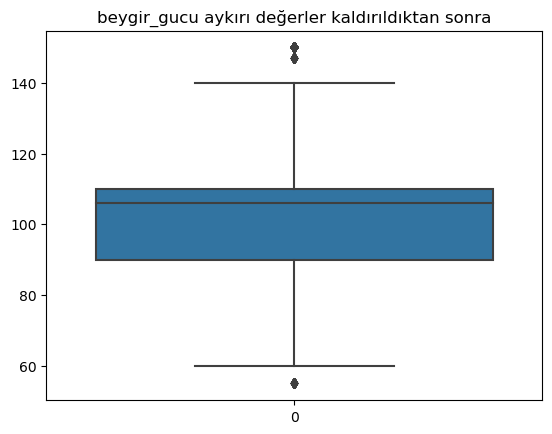

In [47]:
sns.boxplot(data=veri2["beygir_gucu"])
plt.title("beygir_gucu aykırı değerler kaldırıldıktan sonra")
plt.show()

Veri setimizdeki motor sütunundaki aykırı değerleri tespit etmek için grafiğini çizdiriyoruz.

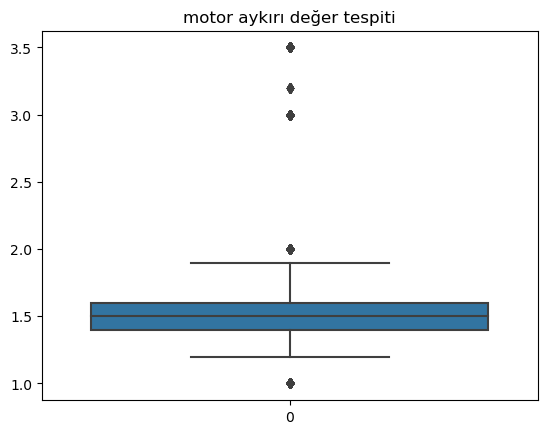

In [48]:
sns.boxplot(data=df["motor"])
plt.title("motor aykırı değer tespiti")
plt.show()

motor sütunundaki aykırı değerleri kaldırıyoruz.

In [49]:
Q1 = df["motor"].quantile(0.25)
Q3 = df["motor"].quantile(0.75)
IQR = Q3 - Q1

altsınır = Q1 - 1.5 * IQR
ustsınır = Q3 + 1.5 * IQR

aykırımin = df[df["motor"] < altsınır]["motor"]
aykırımax = df[df["motor"] > ustsınır]["motor"]

aykırı = pd.concat([aykırımin, aykırımax], axis=0).index
indeksler = []
for i in aykırı:
    indeksler.append(i)

veri2 = df.drop(df.index[indeksler])

motor sütunundan aykırı değerleri kaldırdıktan sonraki grafiğini çizdiriyoruz.

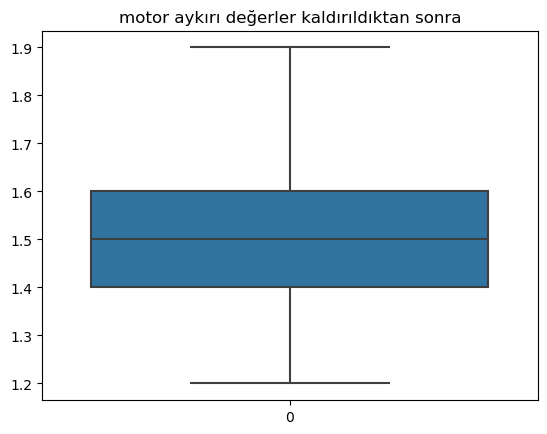

In [50]:
sns.boxplot(data=veri2["motor"])
plt.title("motor aykırı değerler kaldırıldıktan sonra")
plt.show()

Veri setimizdeki fiyat sütunundaki aykırı değerleri tespit etmek için grafiğini çizdiriyoruz.

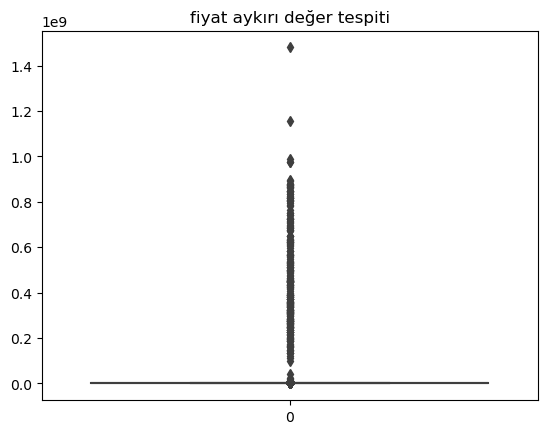

In [51]:
sns.boxplot(data=df["fiyat"])
plt.title("fiyat aykırı değer tespiti")
plt.show()

fiyat sütunundaki aykırı değerleri kaldırıyoruz.

In [52]:
Q1 = df["fiyat"].quantile(0.25)
Q3 = df["fiyat"].quantile(0.75)
IQR = Q3 - Q1

altsınır = Q1 - 1.5 * IQR
ustsınır = Q3 + 1.5 * IQR

aykırımin = df[df["fiyat"] < altsınır]["fiyat"]
aykırımax = df[df["fiyat"] > ustsınır]["fiyat"]

aykırı = pd.concat([aykırımin, aykırımax], axis=0).index
indeksler = []
for i in aykırı:
    indeksler.append(i)

veri2 = df.drop(df.index[indeksler])

fiyat sütunundan aykırı değerleri kaldırdıktan sonraki grafiğini çizdiriyoruz.

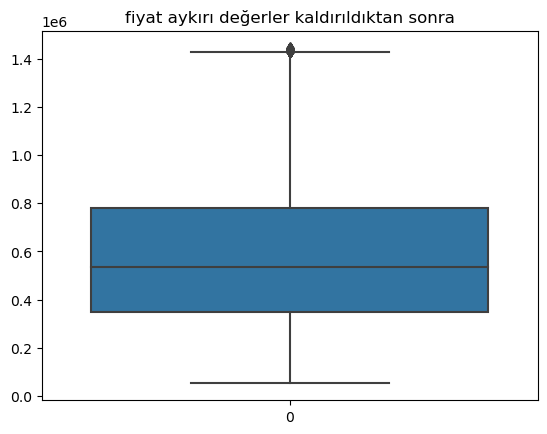

In [53]:
sns.boxplot(data=veri2["fiyat"])
plt.title("fiyat aykırı değerler kaldırıldıktan sonra")
plt.show()

Aykırı değerleri çıkardıktan sonra verisetimizde 535048 adet veriden 529160 adet veri kaldı.

In [54]:
df = veri2.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529160 entries, 0 to 535047
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fiyat           529160 non-null  float64
 1   otomobil_label  529160 non-null  object 
 2   marka_label     529160 non-null  object 
 3   model_label     529160 non-null  object 
 4   paket_label     529160 non-null  object 
 5   km_bilgisi      529160 non-null  int64  
 6   model_yili      529160 non-null  int64  
 7   yakit_turu      529160 non-null  object 
 8   beygir_gucu     529160 non-null  int64  
 9   vites_turu      529160 non-null  object 
 10  motor           529160 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 64.6+ MB


otomobil_label sütunumuzdaki değerlerin sayısını görelim.

In [55]:
df.otomobil_label.value_counts()

otomobil_label
Otomobil               524600
Arazi, SUV & Pickup      4560
Name: count, dtype: int64

otomobil_label sütunumuzdaki değerlerin sayısınının bar grafiğini çizdirelim.

<Axes: xlabel='otomobil_label'>

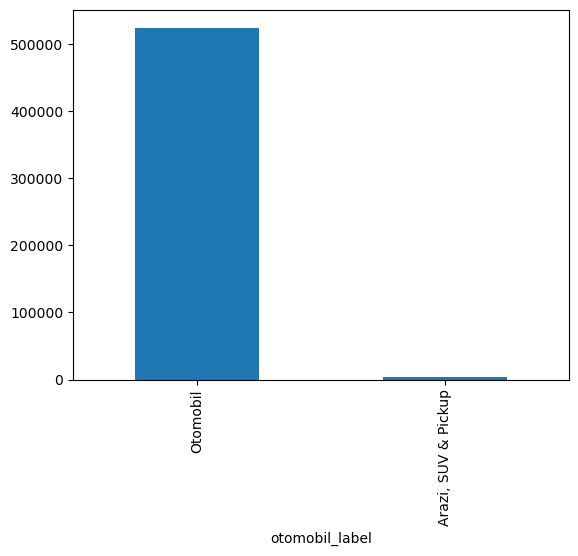

In [56]:
df.otomobil_label.value_counts().plot.bar()

marka_label sütunumuzdaki değerlerin sayısını görelim.

In [57]:
df.marka_label.value_counts()

marka_label
Renault       261795
Volkswagen    178577
Audi           76620
Opel            7608
Citroën         3786
Isuzu            774
Name: count, dtype: int64

marka_label sütunumuzdaki değerlerin sayısınının bar grafiğini çizdirelim.

<Axes: xlabel='marka_label'>

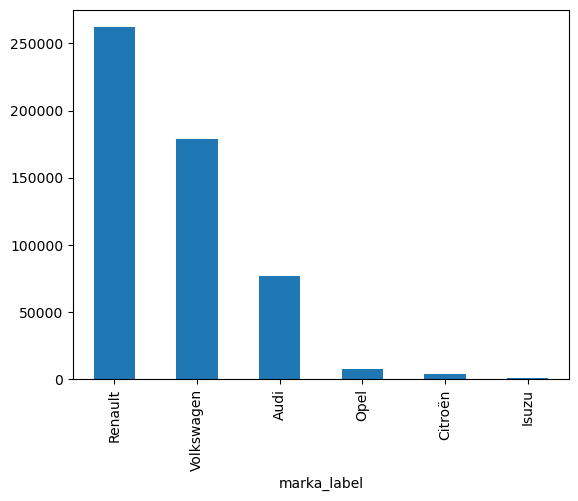

In [58]:
df.marka_label.value_counts().plot.bar()

model_label sütunumuzdaki değerlerin sayısını görelim.

In [59]:
df.model_label.value_counts()

model_label
Megane         261795
Polo           178577
A3              76620
Astra            7608
C3 AirCross      3786
D-Max             774
Name: count, dtype: int64

mdoel_label sütunumuzdaki değerlerin sayısınının bar grafiğini çizdirelim.

<Axes: xlabel='model_label'>

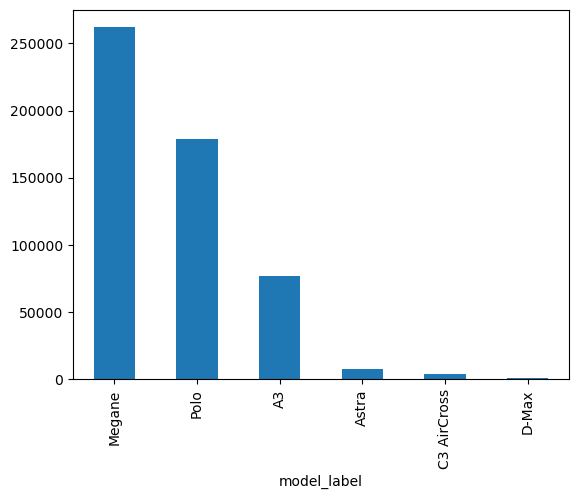

In [60]:
df.model_label.value_counts().plot.bar()

paket_label sütunumuzdaki değerlerin sayısını görelim.

In [61]:
df.paket_label.value_counts()

paket_label
Comfortline           89520
Touch                 55530
Joy                   39103
Trendline             38441
Dynamique             34913
                      ...  
Quattro Ambiente          2
Quattro Ambition          1
Quattro Attraction        1
Sport                     1
1.9 D                     1
Name: count, Length: 127, dtype: int64

paket_label sütunumuzdaki değerlerin sayısınının bar grafiğini çizdiriyoruz fakat çok fazla değişken olduğundan dolayı rahat yorumlayamıyoruz.

<Axes: xlabel='paket_label'>

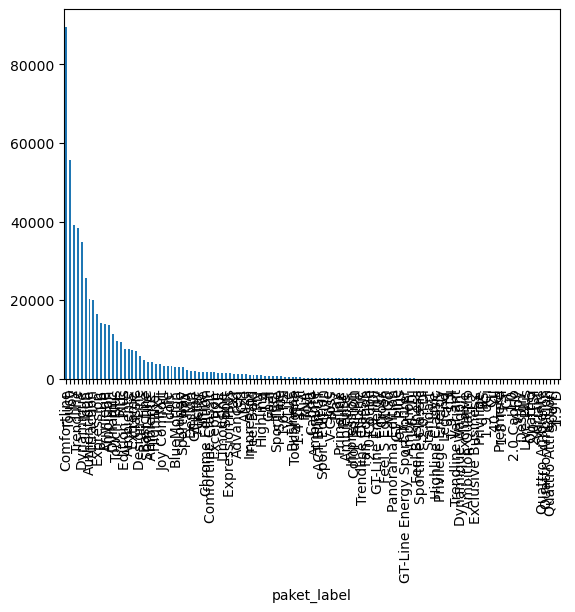

In [62]:
df.paket_label.value_counts().plot.bar()

paket_label sütunumuzdaki değerlerin sayısının 1000den fazla olanları çizdiriyoruz.

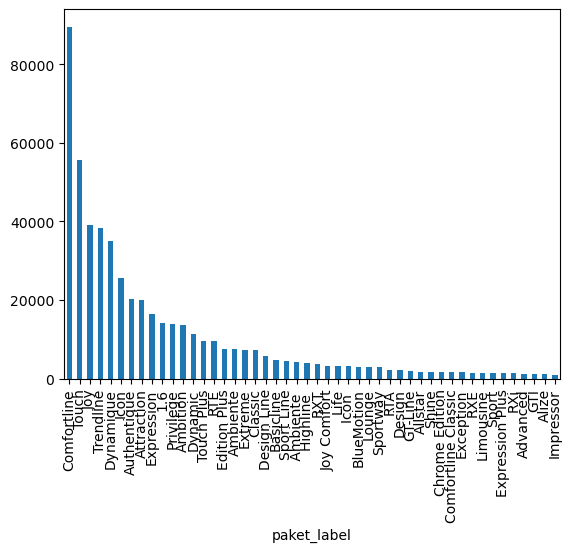

In [63]:
# paket_label sütunundaki değerleri sayarak adetleri alıyoruz
value_counts = df['paket_label'].value_counts()

# 1000'den fazla olanları filtreleyip çubuk grafik olarak gösteriyoruz
value_counts[value_counts > 1000].plot.bar()
plt.show()

yakit_türü sütunumuzdaki değerlerin sayısını görelim.

In [64]:
df.yakit_turu.value_counts()

yakit_turu
Dizel           280446
Benzin          130977
Benzin & LPG    117510
Hybrid             226
Elektrik             1
Name: count, dtype: int64

yakit_turu sütunumuzdaki değerlerin sayısınının bar grafiğini çizdirelim.

<Axes: xlabel='yakit_turu'>

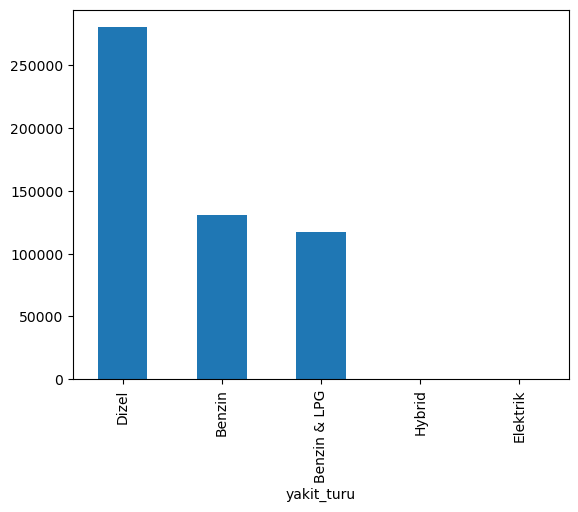

In [65]:
df.yakit_turu.value_counts().plot.bar()

vites_turu sütunumuzdaki değerlerin sayısını görelim.

In [66]:
df.vites_turu.value_counts()

vites_turu
Manuel           252449
Otomatik         194057
Yarı Otomatik     82654
Name: count, dtype: int64

vites_turu sütunumuzdaki değerlerin sayısınının bar grafiğini çizdirelim.

<Axes: xlabel='vites_turu'>

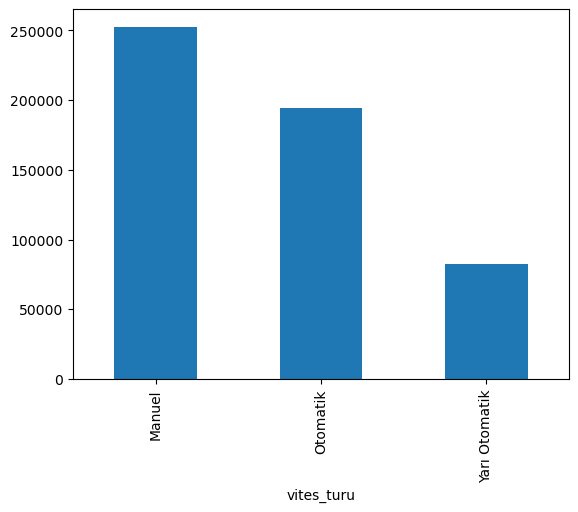

In [67]:
df.vites_turu.value_counts().plot.bar()

# 2. Öznitelik Seçimi ve Mühendisliği

Potansiyel öznitelik dönüşümü olarak aracının yaşının model_yili' ndan hesaplayalım ve model_yili sütununu veri setimizden kaldıralım. Logaritma alırken sonsuz değer problemine düşmemek içim km'lere 1 ekleyelim(0 km araçlar için)

## 2.1 Potansiyel öznitelik dönüşümlerini keşfi

In [68]:
current_year = 2024
df['yas'] = current_year - df['model_yili']
df.drop(columns='model_yili', axis=1, inplace=True)

df['km_bilgisi'] = df['km_bilgisi'] + 1

Potansiyel öznitelik dönüşümlerine ek olarak verisetimizdeki sayısal değerlerin logaritmasını alalım.

In [69]:
log = np.log(df.iloc[:, [0, 5, 7, 9, 10]])
df.drop(columns=df.columns[[0, 5, 7, 9, 10]], inplace=True)
df = pd.concat([df, log], axis=1)

Veri setimizin güncel ilk 3 satırnı görüntüleyelim.

In [70]:
df.head(3)

,otomobil_label,marka_label,model_label,paket_label,yakit_turu,vites_turu,fiyat,km_bilgisi,beygir_gucu,motor,yas
0,Otomobil,Renault,Megane,Icon,Dizel,Otomatik,13.629181,11.870607,4.700480,0.405465,2.079442
1,Otomobil,Renault,Megane,Icon,Dizel,Otomatik,13.715690,11.289794,4.700480,0.405465,1.945910
2,Otomobil,Audi,A3,Attraction,Benzin & LPG,Manuel,13.451667,12.083911,4.624973,0.470004,2.564949


## 2.2 Kategorik Değişkenlerin Sayısal Değere Dönüştürülmesi

Veri setimizdeki kategorik değişkenlere one hot encoding işlemi uygulayalım.

In [71]:
kategori = []
kategorik = df.select_dtypes(include=["object"])

for i in kategorik.columns:
    kategori.append(i)

df = pd.get_dummies(df, columns=kategori, drop_first=True, prefix='')

Veri setimizin güncel ilk 3 satırnı görüntüleyelim.

In [72]:
df.head(3)

,fiyat,km_bilgisi,beygir_gucu,motor,yas,_Otomobil,_Citroën,_Isuzu,_Opel,_Renault,...,_V-Go,_V-Joy,_V-Life,_Variant,_Benzin & LPG,_Dizel,_Elektrik,_Hybrid,_Otomatik,_Yarı Otomatik
0,13.629181,11.870607,4.700480,0.405465,2.079442,True,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,13.715690,11.289794,4.700480,0.405465,1.945910,True,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,13.451667,12.083911,4.624973,0.470004,2.564949,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Veri setimizin en son halinin yedeğini csv doyası olarak alalım.

In [73]:
df.to_csv('son_fiyat_tahmin_son.csv', index=False)

## 2.3 Fiyat Tahmini İçin İlgili Özelliklerin Belirlenmesi 

Yedeğini aldığımız csv dosyasını df'e aktaralım.

In [74]:
data = pd.read_csv('son_fiyat_tahmin_son.csv')
df = data.copy()

Fiyat tamin modeli uygulamak için y değişkenine fiyat sütununu atayalım. Ardından X sütununa geri kalan sütunları atayalım.

In [75]:
y = df['fiyat']
X = df.drop(columns='fiyat', axis=1)

Oluşturduğumuz y değişkenin ilk 5 satırını görüntüleyelim. 

In [76]:
y.head()

0    13.629181
1    13.715690
2    13.451667
3    14.137594
4    13.180632
Name: fiyat, dtype: float64

Oluşturduğumuz X değişkenin ilk 5 satırını görüntüleyelim.

In [77]:
X.head()

,km_bilgisi,beygir_gucu,motor,yas,_Otomobil,_Citroën,_Isuzu,_Opel,_Renault,_Volkswagen,...,_V-Go,_V-Joy,_V-Life,_Variant,_Benzin & LPG,_Dizel,_Elektrik,_Hybrid,_Otomatik,_Yarı Otomatik
0,11.870607,4.700480,0.405465,2.079442,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,11.289794,4.700480,0.405465,1.945910,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,12.083911,4.624973,0.470004,2.564949,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,10.404293,5.010635,1.252763,1.386294,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11.736077,4.317488,0.336472,2.197225,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


# 3. Model Oluşturma

Makine öğrenmesi modellerimizi eğitmek ve test etmek için %20 test verisi olacak şekilde bölelim. 

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X değişkenlerini StandartScaler ile standartlaştıralım.

In [79]:
from sklearn.preprocessing import StandardScaler

sX = StandardScaler()
X_train_sc = sX.fit_transform(X_train)
X_test_sc = sX.transform(X_test)

# 3.1 Farklı Modelleri Uygulama

Linear Regresyon ile modelimi eğitelim ve test verilerimizle karşılaştırarak r^2 değerini hesaplayalım.

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)

lineer regresyon r^2 değeri oldukça kötü çıktı.

In [81]:
print("lineer regresyon r^2: ", mt.r2_score(y_test, y_pred))

lineer regresyon r^2:  -5.8444930676479176e+16


Ridge Regression ile modelimizi eğitelim ve test verilerimizle karşılaştırarak r^2 değerini hesaplayalım.

In [82]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred2 = ridge.predict(X_test)
print("Ridge rosso r^2: ", mt.r2_score(y_test, y_pred2))

Ridge rosso r^2:  0.7686784498671118


ElasticNet Regression ile modelimizi eğitelim ve test verilerimizle karşılaştırarak r^2 değerini hesaplayalım.

In [83]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1)
en.fit(X_train, y_train)
y_pred4 = en.predict(X_test)
print("ElasticNet r^2: ", mt.r2_score(y_test, y_pred4))

ElasticNet r^2:  0.5912793428875782


Decision Tree Regression ile modelimizi eğitelim ve test verilerimizle karşılaştırarak r^2 değerini hesaplayalım.

In [84]:
from sklearn.tree import DecisionTreeRegressor

r_dt = DecisionTreeRegressor(random_state=42)
r_dt.fit(X_train, y_train)
y_pred7 = r_dt.predict(X_test)
print('decision tree r^2: ', mt.r2_score(y_test, y_pred7))

decision tree r^2:  0.7618555212113871


Random Forest regresyon ile modelimizi eğitelim ve test verilerimizle karşılaştırarak r^2 değerini hesaplayalım.

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred8 = rf_reg.predict(X_test)
print('random forest r^2: ', mt.r2_score(y_test, y_pred8))

random forest r^2:  0.7949837388136201


XGB ile regresyon ile modelimizi eğitelim ve test verilerimizle karşılaştırarak r^2 değerini hesaplayalım.

In [86]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb1 = XGBRegressor(colsample_bytree=1,
                    learning_rate=0.3,
                    max_depth=6,
                    n_estimators=100)
model_xgb = xgb1.fit(X_train, y_train)
y_pred9 = model_xgb.predict(X_test)
print('XGBRegressor(xgb1) r^2: ', mt.r2_score(y_test, y_pred9))

XGBRegressor(xgb1) r^2:  0.8105028349629503


XGBRegressorun farklı parametre değerleri ile modelimizi eğitelim ve test verilerimizle karşılaştırarak r^2 değerini hesaplayalım.

In [87]:
xgb2 = XGBRegressor(colsample_bytree=0.7,
                    learning_rate=0.1,
                    max_depth=10,
                    min_child_weight=7,
                    objective='reg:squarederror',
                    subsample=0.7)
model_xgb2 = xgb2.fit(X_train, y_train)
y_pred10 = model_xgb2.predict(X_test)
print('XGBRegressor(xgb2) r^2:', mt.r2_score(y_test, y_pred10))

XGBRegressor(xgb2) r^2: 0.81329130672299


# 4. Model Değerlendirme

In [88]:
print("lineer regresyon r^2: ", mt.r2_score(y_test, y_pred))
print("Ridge rosso r^2: ", mt.r2_score(y_test, y_pred2))
print("ElasticNet r^2: ", mt.r2_score(y_test, y_pred4))
print('decision tree r^2: ', mt.r2_score(y_test, y_pred7))
print('random forest r^2: ', mt.r2_score(y_test, y_pred8))
print('XGBRegressor(xgb1) r^2: ', mt.r2_score(y_test, y_pred9))
print('XGBRegressor(xgb2) r^2:', mt.r2_score(y_test, y_pred10))

lineer regresyon r^2:  -5.8444930676479176e+16
Ridge rosso r^2:  0.7686784498671118
ElasticNet r^2:  0.5912793428875782
decision tree r^2:  0.7618555212113871
random forest r^2:  0.7949837388136201
XGBRegressor(xgb1) r^2:  0.8105028349629503
XGBRegressor(xgb2) r^2: 0.81329130672299


Görüldüğü üzere en yüksek r^2 değeri 0.81329130672299 ile 2XGBRegressor modelimiz oldu.

Modelimizin yedek dosyasını oluşturalım.

# 5. Öneri Sistemi

In [89]:
import pickle

model_dosyasi = "arac_fiyat_XGBRegressor"
pickle.dump(xgb2, open(model_dosyasi, 'wb'))

In [90]:
data = pd.read_csv('son_fiyat_tahmin_son.csv')
df = data.copy()

Yedeğini aldığımız modelin mymodel'e koyalım.

In [91]:
mymodel = pickle.load(open("arac_fiyat_XGBRegressor", 'rb'))

#### Kullanıcıdan alınan araç özelliklerini kabul eden kullanıcı dostu bir program geliştirelim.

Örnek olarak ilk olarak km: 227000, beygir: 102, motor: 1.6, yıl: 2004, Otomobil, Audi, A3, Attraction, Benzin & LPG, Otomatik değerlerini girelim.

Ardından ikinci örnek olarak km: 235000, beygir: 100, motor: 1.5, yıl: 2006, Otomobil, Renault, Megane, Expession Plus, Dizel, Manuel değerlerini girelim ve tahmin edilen fiyatları inceleyelim.

In [92]:
while True:
    #5
    km = int(input("km: "))
    lg_km = np.log(km)

    #8
    bg = int(input("beygir: "))
    lg_bg = np.log(bg)

    #10
    mt = float(input("motor: "))
    lg_mt = np.log(mt)

    #6
    yil = int(input("yıl: "))
    yas = 2024 - yil
    lg_yas = np.log(yas)

    #1
    print("1-Otomobil\n2-Arazi, SUV & Pickup")
    secim = int(input("Araç türü: "))

    if secim == 1:
        oto = True
    elif secim == 2:
        oto = False

    #2
    print("1-Citroën\n2-Isuzu\n3-Opel\n4-Renault\n5-Volkswagen\n6-Audi")
    marka_etiketleri = {
        1: "Citroën",
        2: "Isuzu",
        3: "Opel",
        4: "Renault",
        5: "Volkswagen",
    }
    secim = int(input("Marka: "))
    for marka in marka_etiketleri:
        marka_etiketleri[marka] = False
    if secim in marka_etiketleri:
        marka_etiketleri[secim] = True

    #3
    print("1-Astra\n2-C3 AirCross\n3-D-Max\n4-Megane\n5-Polo\n6-A3")
    model_etiketleri = {
        1: "Astra",
        2: "C3 AirCross",
        3: "D-Max",
        4: "Megane",
        5: "Polo",
    }
    secim = int(input("Model: "))
    for model in marka_etiketleri:
        model_etiketleri[model] = False
    if secim in marka_etiketleri:
        model_etiketleri[secim] = True

    #4
    secim = '_' + input("Paket: ")
    paket = df.columns[16:142]
    paket_etiket = {sutun: False for sutun in paket}
    if secim in paket_etiket:
        paket_etiket[secim] = True

    #7
    print("1-Benzin & LPG\n2-Dizel\n3-Elektrik\n4-Hybrid\n5-Benzin")
    yakit_etiketleri = {
        1: "Benzin & LPG",
        2: "Dizel",
        3: "Elektrik",
        4: "Hybrid",
    }
    secim = int(input("Yakıt Türü: "))
    for yakit in yakit_etiketleri:
        yakit_etiketleri[yakit] = False
    if secim in yakit_etiketleri:
        yakit_etiketleri[secim] = True

    #9
    print("1-Otomatik\n2-Yarı Otomatik\n3-Manuel")
    vites_etiketleri = {
        1: "Otomatik",
        2: "Yarı Otomatik",
    }
    secim = int(input("Vites Türü: "))
    for vites in vites_etiketleri:
        vites_etiketleri[vites] = False
    if secim in vites_etiketleri:
        vites_etiketleri[secim] = True

    user_input = [
        lg_km, lg_bg, lg_mt, lg_yas, oto, *marka_etiketleri.values(),
        *model_etiketleri.values(), *paket_etiket.values(),
        *yakit_etiketleri.values(), *vites_etiketleri.values()
    ]

    # Assuming model_xgb is already trained
    prediction = mymodel.predict([user_input])

    print("Önerilen Fiyat :", np.exp(prediction[0]))

    devam = input("Başka bir tahmin yapmak ister misiniz? (E/H): ")
    if devam.lower() != 'e':
        break

km: 227000
beygir: 102
motor: 1.6
yıl: 2004
1-Otomobil
2-Arazi, SUV & Pickup
Araç türü: 1
1-Citroën
2-Isuzu
3-Opel
4-Renault
5-Volkswagen
6-Audi
Marka: 6
1-Astra
2-C3 AirCross
3-D-Max
4-Megane
5-Polo
6-A3
Model: 6
Paket: Attraction
1-Benzin & LPG
2-Dizel
3-Elektrik
4-Hybrid
5-Benzin
Yakıt Türü: 1
1-Otomatik
2-Yarı Otomatik
3-Manuel
Vites Türü: 1
Önerilen Fiyat : 368442.72
Başka bir tahmin yapmak ister misiniz? (E/H): e
km: 235000
beygir: 100
motor: 1.5
yıl: 2006
1-Otomobil
2-Arazi, SUV & Pickup
Araç türü: 1
1-Citroën
2-Isuzu
3-Opel
4-Renault
5-Volkswagen
6-Audi
Marka: 4
1-Astra
2-C3 AirCross
3-D-Max
4-Megane
5-Polo
6-A3
Model: 4
Paket: Expression Plus
1-Benzin & LPG
2-Dizel
3-Elektrik
4-Hybrid
5-Benzin
Yakıt Türü: 2
1-Otomatik
2-Yarı Otomatik
3-Manuel
Vites Türü: 3
Önerilen Fiyat : 339242.78
Başka bir tahmin yapmak ister misiniz? (E/H): h


Görüldüğü üzere mevcut veri setimizdeki test değerlerine oldukça yakın sonuçlar üretmektedir.

Ana hedefin dışında veriden elde edilebilecek diğer önemli bilgilerinde araştırılması istenmekte. Bu nedenle daha önce yedeğini almış olduğumuz csv dosyasını df2' ye aktaralım.

In [93]:
df2 = pd.read_csv('dahil_il_ilce_mahalle2.csv')
df2.isnull().sum()

fiyat                  0
otomobil_label         0
marka_label            0
model_label            0
paket_label            0
il                 53136
ilce                 293
mahalle           504960
km_bilgisi             0
model_yili             0
yakit_turu             0
beygir_gucu            0
vites_turu             0
motor                  0
dtype: int64

Veri setindeki il,ilçe,mahalle sütunlarındaki NaN değerleri Belirtilmemiş olarak değiştirelim.

In [94]:
df2 = df2.fillna('Belirtilmemiş')
df2.isnull().sum()

fiyat             0
otomobil_label    0
marka_label       0
model_label       0
paket_label       0
il                0
ilce              0
mahalle           0
km_bilgisi        0
model_yili        0
yakit_turu        0
beygir_gucu       0
vites_turu        0
motor             0
dtype: int64

Hangi ilin hangi ilçesinde en popüler araba marka sayısını bulalım.

Populer araç markalarına göre tamirci,aksesuarcı,parçacı açılabilir

In [95]:
# Her ilçede her markadan kaç araç olduğunu gruplayarak sayalaım
il_ilce_marka_sayisi = df2.groupby(['il', 'ilce', 'marka_label'
                                    ]).size().reset_index(name='arac_sayisi')

# Her il için en çok bulunan markayı belirleyelim.
en_cok_bulunan_markalar = il_ilce_marka_sayisi.loc[
    il_ilce_marka_sayisi.groupby(['il', 'ilce'])['arac_sayisi'].idxmax()]

# Her il için en çok bulunan markayı gösterelim
en_cok_bulunan_markalar_il = en_cok_bulunan_markalar.groupby('il').apply(
    lambda x: x.loc[x['arac_sayisi'].idxmax()])

en_cok_bulunan_markalar_il[['il', 'ilce', 'marka_label', 'arac_sayisi']]

,il,ilce,marka_label,arac_sayisi
il,,,,
Adana,Adana,Seyhan,Renault,3189
Adıyaman,Adıyaman,Merkez,Renault,586
Afyonkarahisar,Afyonkarahisar,Merkez,Volkswagen,855
Aksaray,Aksaray,Merkez,Volkswagen,1134
Amasya,Amasya,Merkez,Renault,458
...,...,...,...,...
Çorum,Çorum,Merkez,Renault,860
İstanbul,İstanbul,Bağcılar,Renault,6671
İzmir,İzmir,Buca,Renault,1895


Kullanıcıdan il ve ilçe istiyerek kullanıcın girmiş olduğun il ve ilçedeki en popüler araba markasını getirelim. Böylelikle kullanıcı o ilçedeki en popüler araba markasının tamircisini açabilir, o markaya özel aksesuarcı açabilir vs.

In [96]:
şehir = input("il: ")
ilçe = input("ilçe: ")
il_ilce_marka_en_cok = il_ilce_marka_sayisi[
    (il_ilce_marka_sayisi['il'] == 'Adana')
    & (il_ilce_marka_sayisi['ilce'] == 'Seyhan')]
en_cok_marka = il_ilce_marka_en_cok.loc[
    il_ilce_marka_en_cok['arac_sayisi'].idxmax()]

print("Girmiş olduğunuz il ve ilçede en çok bulunan marka: ",
      en_cok_marka['marka_label'], " - ", en_cok_marka['arac_sayisi'], " adet")

il: Adana
ilçe: Seyhan
Girmiş olduğunuz il ve ilçede en çok bulunan marka:  Renault  -  3189  adet


Hangi markanın en çok tutulan modeli ve özelliklerini(paket vs)'nin tespit edilmesi. Böylelikler Piyasada en çok tutulan modeli ve özellikleri tespit edilmiş olur.

In [97]:
marka_model_paket_yil_sayisi = df2.groupby(
    ['marka_label', 'model_label', 'paket_label',
     'model_yili']).size().reset_index(name='arac_sayisi')
en_cok_bulunan_markalar2 = marka_model_paket_yil_sayisi.loc[
    marka_model_paket_yil_sayisi.groupby(
        ['marka_label', 'model_label', 'paket_label',
         'model_yili'])['arac_sayisi'].idxmax()]
en_cok_bulunan_markalar_bla = en_cok_bulunan_markalar2.groupby(
    'marka_label').apply(lambda x: x.loc[x['arac_sayisi'].idxmax()])
en_cok_bulunan_markalar_bla

,marka_label,model_label,paket_label,model_yili,arac_sayisi
marka_label,,,,,
Audi,Audi,A3,Dynamic,2017,4368
Citroën,Citroën,C3 AirCross,Feel Bold,2022,1328
Isuzu,Isuzu,D-Max,V-Life,2022,286
Opel,Opel,Astra,Edition Plus,2020,4111
Renault,Renault,Megane,Touch,2017,16211
Volkswagen,Volkswagen,Polo,Comfortline,2016,11585


Kullanıcıdan bir araç markası alınıp kullanıcıya o markanın en çok tutulan modeli, paketi yılı vs hakkında bilgi verilir. Böylece piyasa da hızlı al-sat yapılabilen modeli ve özelliklerini öğrenmiş olur.

In [98]:
print("Citroën\nIsuzu\nOpel\nRenault\nVolkswagen\nAudi")
brand = input(
    'En çok tutulan özelliklerini öğrenmek istediğiniz araba markasaı: ')
marka_en_cok = en_cok_bulunan_markalar_bla[(
    en_cok_bulunan_markalar_bla['marka_label'] == brand)]
marka_en_cok

Citroën
Isuzu
Opel
Renault
Volkswagen
Audi
En çok tutulan özelliklerini öğrenmek istediğiniz araba markasaı: Renault


,marka_label,model_label,paket_label,model_yili,arac_sayisi
marka_label,,,,,
Renault,Renault,Megane,Touch,2017,16211
